In [1]:
import pandas as pd

# Adjust the delimiter as needed (e.g., '\t' for tab-delimited files)
df = pd.read_csv('x0010.dat', delimiter=',', encoding='utf-8')
print(df.head())

ParserError: Error tokenizing data. C error: Expected 2 fields in line 134, saw 3


In [6]:
def clean_file(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            # Basic check: only keep lines with exactly 1 comma (which suggests 2 fields)
            if line.count(',') == 1:
                outfile.write(line)

clean_file('x0010.dat', 'x0010_clean.dat')

import pandas as pd
df = pd.read_csv('x0010_clean.dat', delimiter=',', encoding='utf-8')
print(df.head())


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 6: invalid continuation byte

In [10]:
import scipy.io as sio
import numpy as np
# Replace 'your_file.mat' with the path to your .mat file
mat_contents = sio.loadmat('A00001.mat')

# Print out the keys to see what variables are stored
print("Keys in the .mat file:", list(mat_contents.keys()))

print(mat_contents)
mat = np.array(mat_contents)
print(mat)

Keys in the .mat file: ['val']
{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)}
{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)}


Keys in the .mat file: ['val']


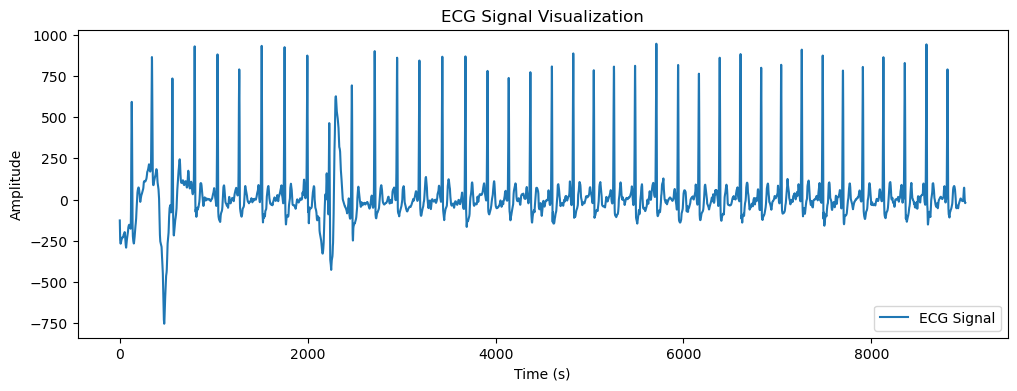

In [12]:
import scipy.io as sio
import matplotlib.pyplot as plt

# Load the .mat file
mat_contents = sio.loadmat('A00001.mat')

# Look at the keys to see what is inside
print("Keys in the .mat file:", list(mat_contents.keys()))

# Extract the data (adjust the key names based on your file)
# For example, if you have 'time' and 'ecg_signal'
# time = mat_contents['time'].squeeze()       # Remove extra dimensions if needed
ecg_signal = mat_contents['val'].squeeze()

# Visualize the ECG signal
plt.figure(figsize=(12, 4))
plt.plot( ecg_signal, label="ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ECG Signal Visualization")
plt.legend()
plt.show()


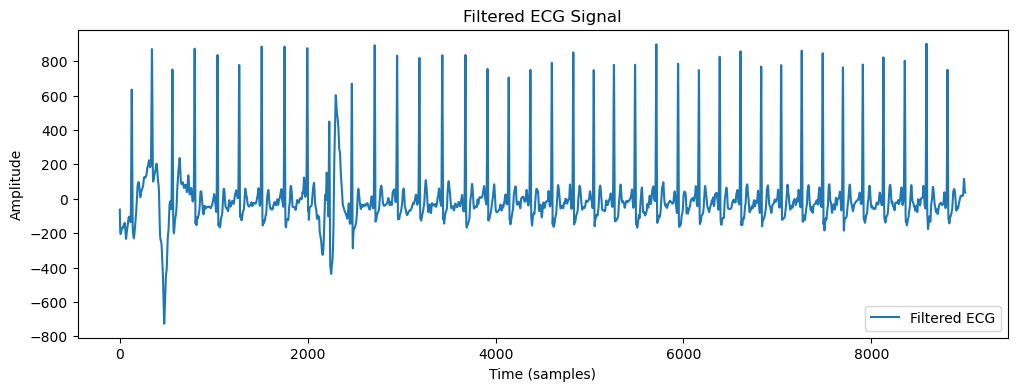

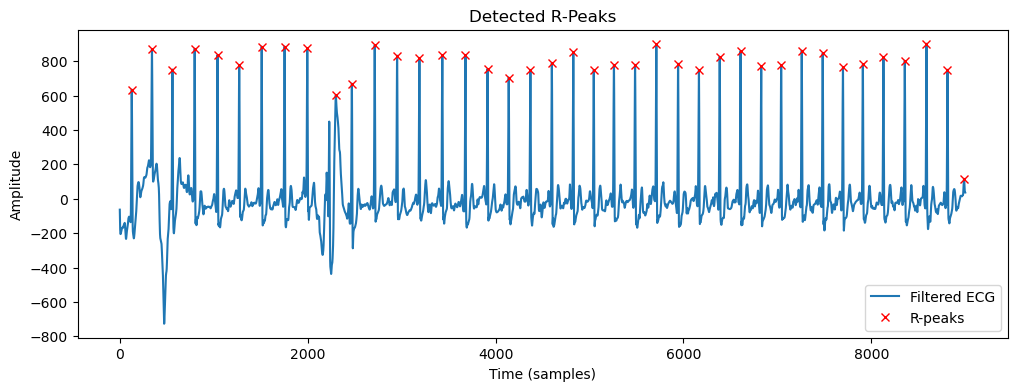

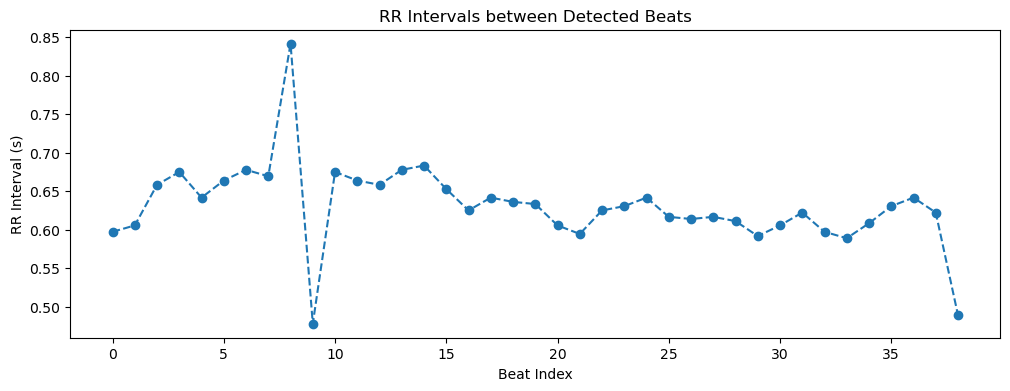

Mean RR Interval: 0.631 s
STD of RR Intervals: 0.055 s
Coefficient of Variation: 0.086
Heart rhythm appears regular based on our RR interval analysis.


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# 1. Load the .mat file and extract the ECG signal.
mat_contents = sio.loadmat('A00001.mat')
# 'val' is assumed to contain the ECG signal; adjust as needed
ecg_signal = mat_contents['val'].squeeze()

# 2. (Optional) Apply a bandpass filter to clean the signal.
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a

# Assume a sampling rate (fs) which you need to know/adjust based on your data.
fs = 360  # for example (Hz)
lowcut = 0.5
highcut = 40.0

b, a = butter_bandpass(lowcut, highcut, fs, order=3)
filtered_ecg = filtfilt(b, a, ecg_signal)

# Visualize the filtered ECG signal
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Filtered ECG Signal")
plt.legend()
plt.show()

# 3. QRS Detection: Find R-peaks in the filtered ECG.
# Here we use scipy.signal.find_peaks. Adjust 'distance' and 'prominence' as needed.
min_distance = int(0.4 * fs)  # assuming a minimum RR interval of 0.4 sec.
peaks, properties = find_peaks(filtered_ecg, distance=min_distance, prominence=0.5)

# Visualize the detected R-peaks
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(peaks, filtered_ecg[peaks], "rx", label="R-peaks")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Detected R-Peaks")
plt.legend()
plt.show()

# 4. Compute RR intervals (in seconds) and heart rate.
# Note: If you prefer a time base, use your time vector; here we work with sample indices.
rr_intervals = np.diff(peaks) / fs  # converting sample differences to seconds

plt.figure(figsize=(12, 4))
plt.plot(rr_intervals, marker="o", linestyle="--")
plt.xlabel("Beat Index")
plt.ylabel("RR Interval (s)")
plt.title("RR Intervals between Detected Beats")
plt.show()

# 5. Simple Rule-based Arrhythmia Detection:
# For example, a large variability in RR intervals can be a hint for arrhythmia.
if len(rr_intervals) > 1:
    mean_rr = np.mean(rr_intervals)
    std_rr = np.std(rr_intervals)
    coeff_variation = std_rr / mean_rr  # relative variability

    print("Mean RR Interval: {:.3f} s".format(mean_rr))
    print("STD of RR Intervals: {:.3f} s".format(std_rr))
    print("Coefficient of Variation: {:.3f}".format(coeff_variation))
    
    # Define an arbitrary threshold for high variability.
    # This threshold should be optimized based on your signal and arrhythmia type.
    variability_threshold = 0.1  # example threshold
    if coeff_variation > variability_threshold:
        print("Atrial fibrillation detected: High variability in RR intervals!")
    else:
        print("Heart rhythm appears regular based on our RR interval analysis.")
else:
    print("Not enough beats detected for arrhythmia analysis.")


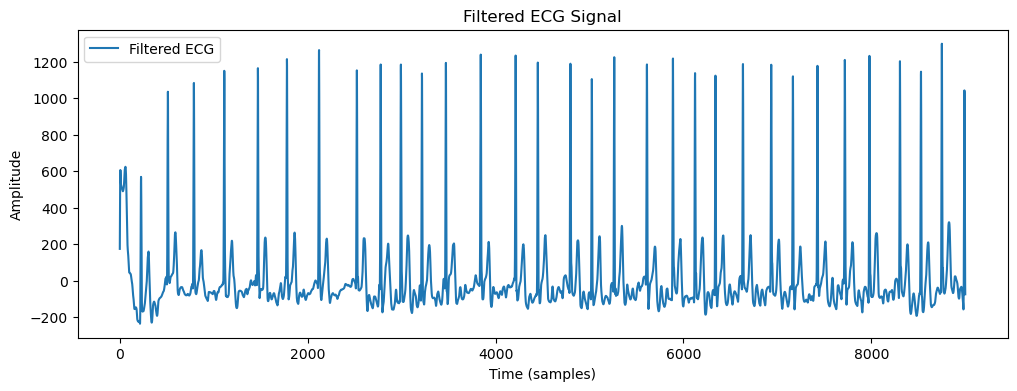

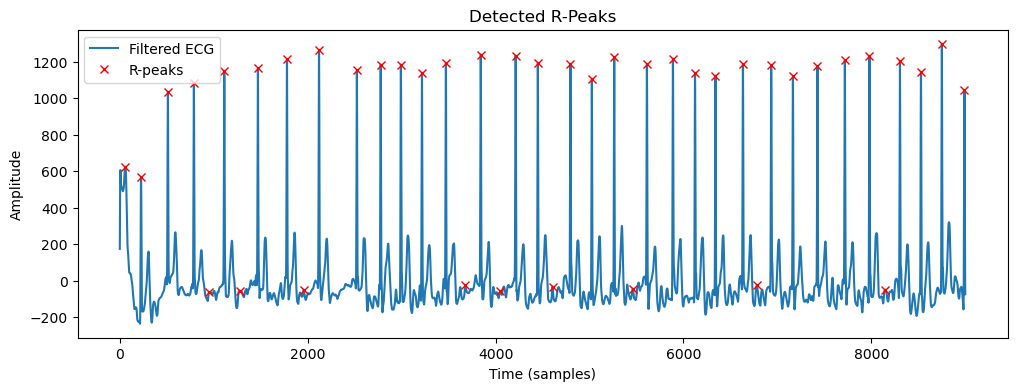

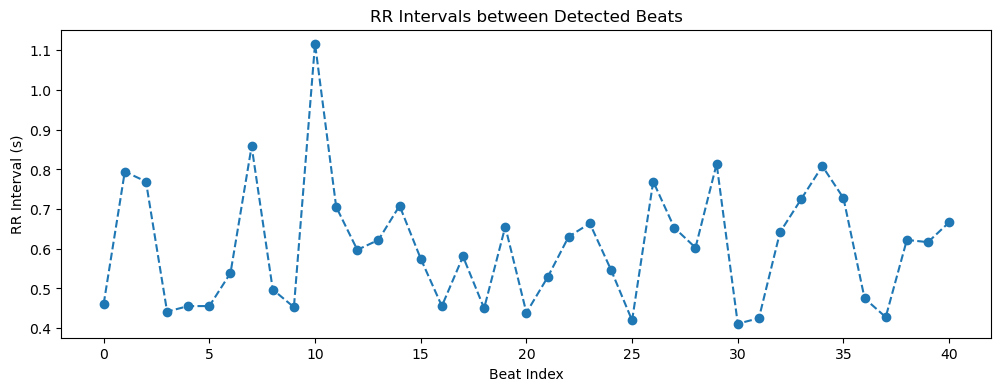

Mean RR Interval: 0.605 s
STD of RR Intervals: 0.151 s
Coefficient of Variation: 0.250
Possible arrhythmia detected: High variability in RR intervals!


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# 1. Load the .mat file and extract the ECG signal.
mat_contents = sio.loadmat('A00004.mat')
# 'val' is assumed to contain the ECG signal; adjust as needed
ecg_signal = mat_contents['val'].squeeze()

# 2. (Optional) Apply a bandpass filter to clean the signal.
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a

# Assume a sampling rate (fs) which you need to know/adjust based on your data.
fs = 360  # for example (Hz)
lowcut = 0.5
highcut = 40.0

b, a = butter_bandpass(lowcut, highcut, fs, order=3)
filtered_ecg = filtfilt(b, a, ecg_signal)

# Visualize the filtered ECG signal
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Filtered ECG Signal")
plt.legend()
plt.show()

# 3. QRS Detection: Find R-peaks in the filtered ECG.
# Here we use scipy.signal.find_peaks. Adjust 'distance' and 'prominence' as needed.
min_distance = int(0.4 * fs)  # assuming a minimum RR interval of 0.4 sec.
peaks, properties = find_peaks(filtered_ecg, distance=min_distance, prominence=0.5)

# Visualize the detected R-peaks
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(peaks, filtered_ecg[peaks], "rx", label="R-peaks")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Detected R-Peaks")
plt.legend()
plt.show()

# 4. Compute RR intervals (in seconds) and heart rate.
# Note: If you prefer a time base, use your time vector; here we work with sample indices.
rr_intervals = np.diff(peaks) / fs  # converting sample differences to seconds

plt.figure(figsize=(12, 4))
plt.plot(rr_intervals, marker="o", linestyle="--")
plt.xlabel("Beat Index")
plt.ylabel("RR Interval (s)")
plt.title("RR Intervals between Detected Beats")
plt.show()

# 5. Simple Rule-based Arrhythmia Detection:
# For example, a large variability in RR intervals can be a hint for arrhythmia.
if len(rr_intervals) > 1:
    mean_rr = np.mean(rr_intervals)
    std_rr = np.std(rr_intervals)
    coeff_variation = std_rr / mean_rr  # relative variability

    print("Mean RR Interval: {:.3f} s".format(mean_rr))
    print("STD of RR Intervals: {:.3f} s".format(std_rr))
    print("Coefficient of Variation: {:.3f}".format(coeff_variation))
    
    # Define an arbitrary threshold for high variability.
    # This threshold should be optimized based on your signal and arrhythmia type.
    variability_threshold = 0.1  # example threshold
    if coeff_variation > variability_threshold:
        print("Atrial fibrillation detected: High variability in RR intervals!")
    else:
        print("Heart rhythm appears regular based on our RR interval analysis.")
else:
    print("Not enough beats detected for arrhythmia analysis.")


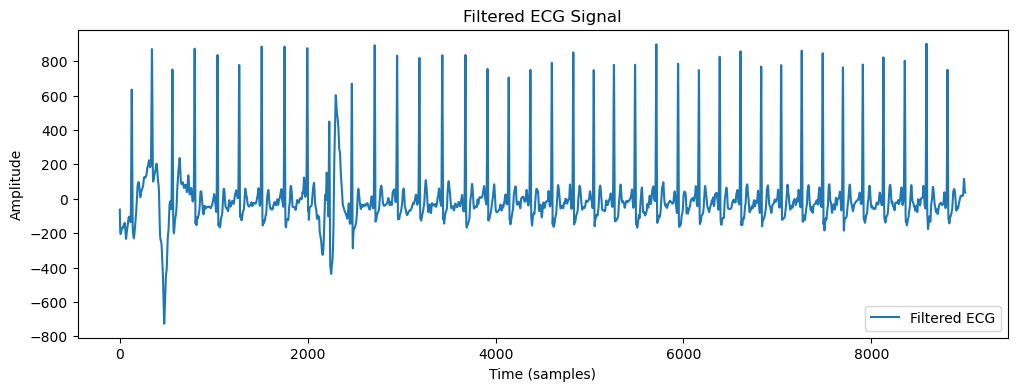

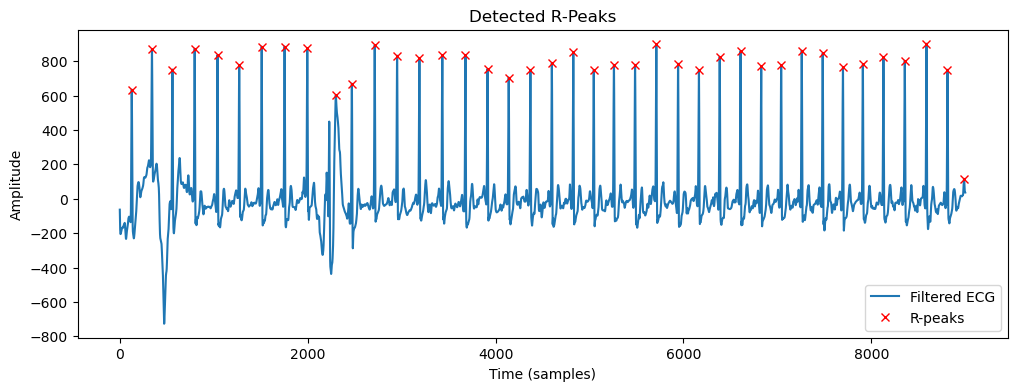

95.8103600692949


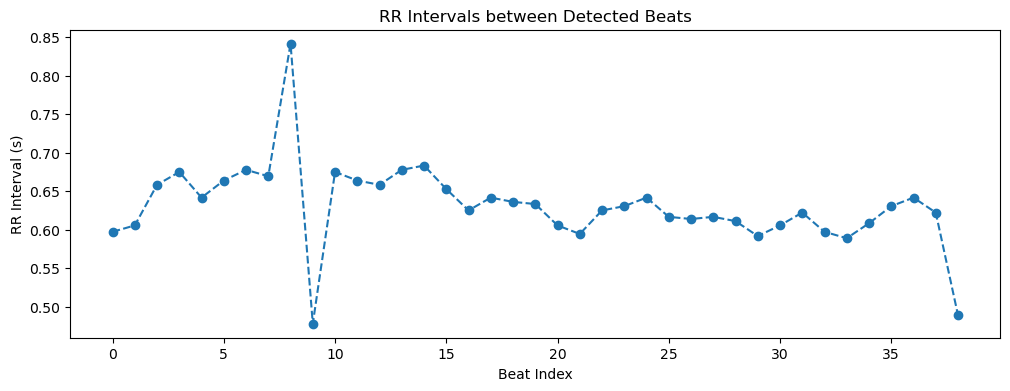

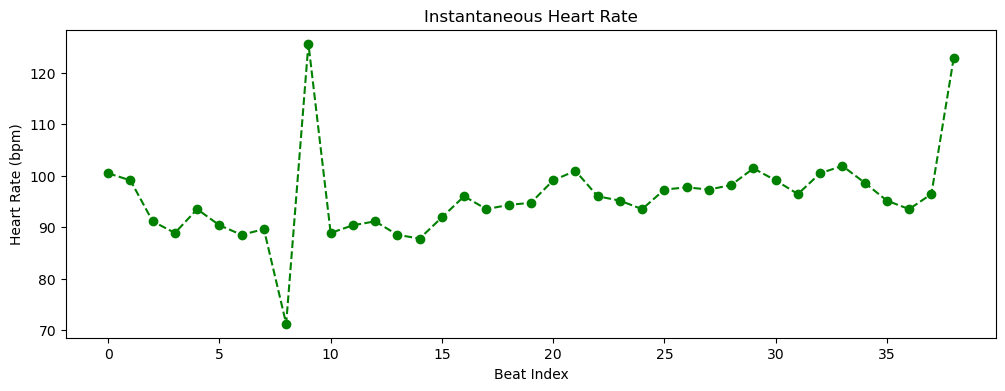

Mean RR Interval: 0.631 s
STD of RR Intervals: 0.055 s
Coefficient of Variation: 0.086
Heart rhythm appears regular based on our RR interval analysis.


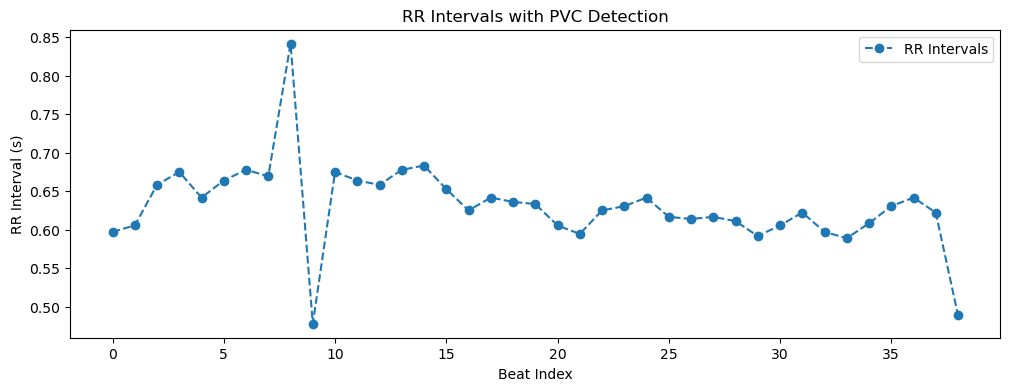

In [23]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# 1. Load the .mat file and extract the ECG signal.
mat_contents = sio.loadmat('A00001.mat')
# 'val' is assumed to contain the ECG signal; adjust the key if necessary
ecg_signal = mat_contents['val'].squeeze()

# 2. (Optional) Apply a bandpass filter to clean the signal.
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a

# Assume a sampling rate (fs) which must be known/adjusted based on your data.
fs = 360  # for example (Hz)
lowcut = 0.5
highcut = 40.0

b, a = butter_bandpass(lowcut, highcut, fs, order=3)
filtered_ecg = filtfilt(b, a, ecg_signal)

# Visualize the filtered ECG signal
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Filtered ECG Signal")
plt.legend()
plt.show()

# 3. QRS Detection: Find R-peaks in the filtered ECG.
# Adjust 'distance' and 'prominence' parameters as needed.
min_distance = int(0.4 * fs)  # assuming a minimum RR interval of 0.4 sec.
peaks, properties = find_peaks(filtered_ecg, distance=min_distance, prominence=0.5)

# Visualize detected R-peaks on the ECG signal.
plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(peaks, filtered_ecg[peaks], "rx", label="R-peaks")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Detected R-Peaks")
plt.legend()
plt.show()

# 4. Compute RR intervals (in seconds) and instantaneous heart rate.
rr_intervals = np.diff(peaks) / fs  # converting sample differences to seconds

# Instantaneous heart rate (in bpm) for each RR interval.
heart_rates = 60 / rr_intervals

print(np.mean(heart_rates))

plt.figure(figsize=(12, 4))
plt.plot(rr_intervals, marker="o", linestyle="--")
plt.xlabel("Beat Index")
plt.ylabel("RR Interval (s)")
plt.title("RR Intervals between Detected Beats")
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(heart_rates, marker="o", linestyle="--", color="green")
plt.xlabel("Beat Index")
plt.ylabel("Heart Rate (bpm)")
plt.title("Instantaneous Heart Rate")
plt.show()

# 5. Simple Rule-based Arrhythmia Detection
# Example for atrial fibrillation detection based on overall RR variability:
if len(rr_intervals) > 1:
    mean_rr = np.mean(rr_intervals)
    std_rr = np.std(rr_intervals)
    coeff_variation = std_rr / mean_rr  # relative variability

    print("Mean RR Interval: {:.3f} s".format(mean_rr))
    print("STD of RR Intervals: {:.3f} s".format(std_rr))
    print("Coefficient of Variation: {:.3f}".format(coeff_variation))
    
    variability_threshold = 0.1  # example threshold for high variability
    if coeff_variation > variability_threshold:
        print("Atrial fibrillation detected: High variability in RR intervals!")
    else:
        print("Heart rhythm appears regular based on our RR interval analysis.")
else:
    print("Not enough beats detected for arrhythmia analysis.")

# 6. Check for PVCs: Identify a premature beat followed by a compensatory pause.
# A premature beat is suspected if an RR interval is less than 80% of the average,
# and the following RR interval is greater than 120% of the average.
pvc_indices = []
for i in range(len(rr_intervals) - 1):
    if (rr_intervals[i] < 0.8 * mean_rr) and (rr_intervals[i + 1] > 1.2 * mean_rr):
        pvc_indices.append(i + 1)  # Mark the compensatory pause index (or the beat following the PVC)

# if pvc_indices:
#     print("PVC suspected at beat indices (relative to RR intervals):", pvc_indices)
# else:
#     print("No PVCs detected based on the criteria.")

# Optionally, visualize the RR intervals and mark PVCs.
plt.figure(figsize=(12, 4))
plt.plot(rr_intervals, marker="o", linestyle="--", label="RR Intervals")
if pvc_indices:
    plt.plot(pvc_indices, np.array(rr_intervals)[pvc_indices], 'rs', markersize=10, label="PVC Suspected")
plt.xlabel("Beat Index")
plt.ylabel("RR Interval (s)")
plt.title("RR Intervals with PVC Detection")
plt.legend()
plt.show()
